In [1]:
#Import usefull package
import os
import re
import string
import random
import numpy as np
import pandas as pd
from collections import Counter

#Import nltk packages to manipulate text
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.metrics import ConfusionMatrix
from nltk.stem.snowball import SnowballStemmer

from nltk import word_tokenize, WordNetLemmatizer, PorterStemmer
from nltk import NaiveBayesClassifier, classify
from nltk import pos_tag
from nltk import ngrams
#***
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk import word_tokenize,sent_tokenize

# Let's add a path containing some useful nltk data
nltk.data.path += ['/mnt/share/nltk_data']

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
from wordcloud import WordCloud

# scikit-learn packages
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics

# word2vec
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rouxe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rouxe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rouxe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rouxe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.getcwd()

'C:\\Users\\rouxe\\PycharmProjects\\Political_debate_summary\\tools'

In [3]:
pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to c:\users\rouxe\appdata\local\temp\pip-req-build-yanve99e
  Resolved https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to commit bc0ebd0135a6cc78f48ddf184069b4c0b9c017d8
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-py3-none-any.whl size=3550631 sha256=c929173e38944c7a836acf31e54d7ddd8da70b44eedf6485f23dff2f2ea0bfc0
  Stored in directory: C:\Users\rouxe\AppData\Local\Temp\pip-ephem-wheel-cache-oozkame0\wheels\99\54\81\553bffdc8e0781c925f9a26606894935adb29b56175a9a358b
Successfully built FrenchLefffLemmatizer
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git 'C:\Users\rouxe\AppData\Local\Temp\pip-req-build-yanve99e'

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

In [5]:
path = 'audio_to_test'

In [6]:
# Nothing to understand
def read_txt(folder):
    """
    Reads all the mails contained in a folder and gathers them in a list

    Args :
        folder (str) : path to the folder containing mails

    Returns :
        mails_list (list) : a list containing mails contents
    """

    txt_list = []
    files_list = os.listdir(folder)
    for file_name in files_list:
        file_content = open(folder + file_name, 'r', encoding='utf-8')
        txt_list.append(file_content.read())
    file_content.close()
    return txt_list

In [7]:
txts = []
for folder in os.listdir(path):
    txts.extend(read_txt(path + "//chunk_Melenchon_Zemmour_txt//"))

In [8]:
txts

["un danger à mes yeux vous êtes un danger pour notre pays vous avez une vision rabougrie de la france vous êtes un raciste vous avez été condamné pour ça vous êtes un homme qui professez une vision de la virilité extrêmement curieuse extrêmement violente c'est vous qui écrivez que les femmes sont le butin des hommes",
 "moi c'est ma position constante je pense que nous n'avons rien à faire dans cette alliance militaire qui d'ailleurs n'a pas de",
 "vous estimez que je contamine le débat public c'est à dire que je suis comme un virus qui contamine c'est votre conception de la démocratie mais ça ne m'étonne pas parce que dans votre camp depuis deux siècles on ne débat pas on guillotine",
 "nous devons sortir du nucléaire quatre centrales sur dix n'ont pas pu fonctionner cette année à cause des sécheresses et des trop grandes chaleurs les les les dangers qui sont contenus personne ne sait les maîtriser",
 'si on continue comme cela',
 'la france en deux mille cinquante sera un liban',
 "

In [9]:
df = pd.DataFrame (txts, columns = ['txt_content'])

In [10]:
df

,txt_content
0,un danger à mes yeux vous êtes un danger pour ...
1,moi c'est ma position constante je pense que n...
2,vous estimez que je contamine le débat public ...
3,nous devons sortir du nucléaire quatre central...
4,si on continue comme cela
...,...
294,monsieur zemmour nous serons nombreux à ne pas...
295,une religion politique par essence l'islam ne ...
296,l'islam est tout à fait aux antipodes
297,la force est mal employée mal organisée et que...


In [11]:
stop_punctuation = [':', '(', ')', '/', '|', ',',
                    '.', '*', '#', '"', '&', '~',
                    '-', '_', '@','?','!']


In [12]:
stoplist = stopwords.words('french')

In [13]:
def clean_text(text):
    # Remove figures
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenization
    words = text.lower().split()
    stemmer = SnowballStemmer('french')
    lemmatizer = FrenchLefffLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stoplist and not w in stop_punctuation ]
    return ' '.join(words)

In [14]:
df["clean_txt"]=df.txt_content.apply(clean_text)

In [15]:
df.head(3)

,txt_content,clean_txt
0,un danger à mes yeux vous êtes un danger pour ...,danger yeux danger pays vision rabougrie franc...
1,moi c'est ma position constante je pense que n...,position constante pense rien faire cette alli...
2,vous estimez que je contamine le débat public ...,estimez contamine bat public dire comme virus ...


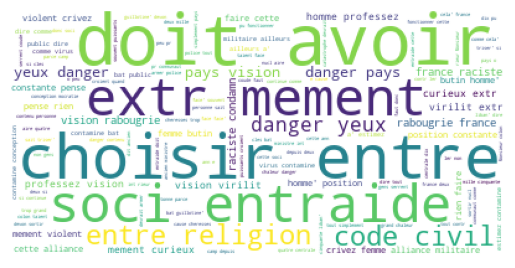

In [20]:
text_to_use = df['clean_txt'].values

wordcloud = WordCloud(background_color='white').generate(str(text_to_use))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()